In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as snb

In [2]:
#fetching the data
data=pd.read_csv('train_revised.csv')

# DATA PREPROCESSING

In [3]:
# viewing the data
data.head()


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [4]:
# some ride_id's in the data appear more than once indicating that tickets for that ride were purchased several times.
# therefore a script should be written in order to identify the number of times a particular ride_id appears
#this will enable us to identify the number_of_tickets for that particular id.
ride_id_dict = {} 
for ride_id in data["ride_id"]:
    if not ride_id in ride_id_dict:
        ride_id_dict[ride_id] = 1
    else:
        ride_id_dict[ride_id] += 1

In [5]:
# feature selection
# dropping unwanted columns
data_processed = data.drop(['seat_number', 'payment_method', 'payment_receipt', 'travel_to','max_capacity'], axis=1)


In [6]:
# creating a column for number_of_tickets
# filling it with ones so we dont have an empty column
data_processed["number_of_tickets"]= np.ones(len(data_processed))

In [7]:
# after getting the number of time a particular ride_id appears, we append those values to the number_of_tickets column
# use for loop
for i in range(len(data_processed)):
    ride_id = data_processed.loc[i]["ride_id"]
    data_processed.at[i,"number_of_tickets"] = ride_id_dict[ride_id]

In [8]:
data_processed.head()

,ride_id,travel_date,travel_time,travel_from,car_type,number_of_tickets
0,1442,17-10-17,7:15,Migori,Bus,1.0
1,5437,19-11-17,7:12,Migori,Bus,1.0
2,5710,26-11-17,7:05,Keroka,Bus,1.0
3,5777,27-11-17,7:10,Homa Bay,Bus,5.0
4,5778,27-11-17,7:12,Migori,Bus,31.0


In [9]:
# save the new data as csv for use in the model.
data_processed.to_csv('train_processed.csv', index=False)

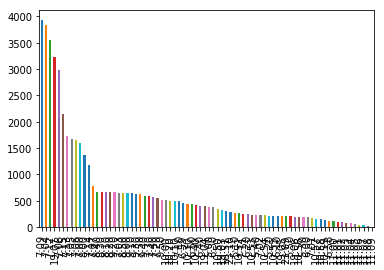

In [10]:
data_processed['travel_time'].value_counts().plot.bar()

So if you look at the describe cell above you'll find something curious with the travel times. Despite the fact that there over 6249 trips, and there's only 78 unquie times, graphed below. Looking at the values, majority of the first 10 are in the morning at 7, tells me that I would make sense to simplify this field to an hour field instead

In [11]:
data_processed['travel_time'].value_counts()

7:09     3926
7:04     3837
7:12     3540
19:07    3227
7:08     2989
7:15     2146
7:13     1724
7:05     1675
7:06     1661
7:00     1603
8:00     1373
7:14     1181
7:07      784
8:40      673
8:30      672
8:10      671
8:20      670
9:20      660
7:03      656
8:50      650
9:00      647
9:10      646
9:30      630
7:50      628
9:40      589
7:30      582
7:40      571
7:20      549
9:50      520
10:00     506
         ... 
6:20      250
10:53     238
5:40      236
7:02      230
10:54     226
5:20      221
10:55     218
6:10      210
19:05     207
23:09     204
5:50      204
19:06     199
10:56     196
5:30      189
6:00      186
7:01      173
10:57     163
10:58     148
10:59     145
6:58      111
11:00     110
11:01     104
11:02      92
11:03      80
11:04      76
11:05      51
11:06      48
11:07      32
11:08      18
11:09       9
Name: travel_time, Length: 78, dtype: int64

In [12]:
data_processed['hour_booked'] = pd.to_numeric(data_processed['travel_time'].str.extract(r'(^\d*)').loc[:,0])

In [13]:
data_processed.head()

,ride_id,travel_date,travel_time,travel_from,car_type,number_of_tickets,hour_booked
0,1442,17-10-17,7:15,Migori,Bus,1.0,7
1,5437,19-11-17,7:12,Migori,Bus,1.0,7
2,5710,26-11-17,7:05,Keroka,Bus,1.0,7
3,5777,27-11-17,7:10,Homa Bay,Bus,5.0,7
4,5778,27-11-17,7:12,Migori,Bus,31.0,7


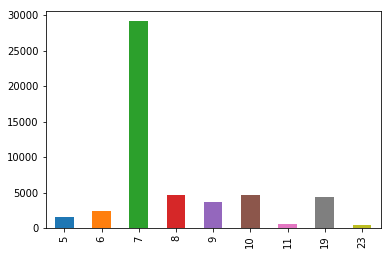

In [14]:
data_processed['hour_booked'].value_counts().sort_index().plot.bar()

In [15]:
((data_processed['hour_booked'].value_counts()/data_processed['hour_booked'].value_counts().sum())*100).sort_index()

5      2.933488
6      4.720689
7     56.549521
8      9.118017
9      7.148804
10     8.916642
11     1.200503
19     8.459677
23     0.952658
Name: hour_booked, dtype: float64

Next I think we can look at dates. We have 149 days, let's make that field more configurable

In [16]:
data_processed.head()

,ride_id,travel_date,travel_time,travel_from,car_type,number_of_tickets,hour_booked
0,1442,17-10-17,7:15,Migori,Bus,1.0,7
1,5437,19-11-17,7:12,Migori,Bus,1.0,7
2,5710,26-11-17,7:05,Keroka,Bus,1.0,7
3,5777,27-11-17,7:10,Homa Bay,Bus,5.0,7
4,5778,27-11-17,7:12,Migori,Bus,31.0,7


In [17]:
data_processed['travel_date'] = pd.to_datetime(data_processed['travel_date'])

So first I looked at the year assuming they came from same year but that would have been a mistakes at the data is from over 2017, 2018. Also the busiest months are the end of the year and the beginning. Added variable for month/year for further exploration.


In [18]:
data_processed['m_y'] = data_processed['travel_date'].dt.strftime('%Y-%m')
data_processed['day'] = data_processed['travel_date'].dt.strftime('%w')

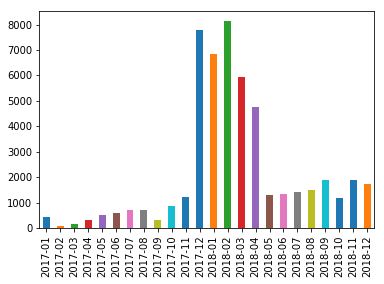

In [19]:
data_processed['m_y'].value_counts().sort_index().plot.bar()

So it seems that for a lot of months in 2017, bookings were made on single days. That might be a problem. Given that the test data for this is for 2018. We'll have to keep an eye on whether removing those months makes sense

In [20]:
for x in data_processed['m_y'].value_counts().sort_index().index:
    print('For month: {}'.format(x))
    print(data_processed[data_processed['m_y']==x]['day'].value_counts().shape)

For month: 2017-01
(1,)
For month: 2017-02
(1,)
For month: 2017-03
(1,)
For month: 2017-04
(1,)
For month: 2017-05
(1,)
For month: 2017-06
(1,)
For month: 2017-07
(1,)
For month: 2017-08
(1,)
For month: 2017-09
(1,)
For month: 2017-10
(2,)
For month: 2017-11
(5,)
For month: 2017-12
(7,)
For month: 2018-01
(7,)
For month: 2018-02
(7,)
For month: 2018-03
(7,)
For month: 2018-04
(7,)
For month: 2018-05
(4,)
For month: 2018-06
(4,)
For month: 2018-07
(4,)
For month: 2018-08
(4,)
For month: 2018-09
(4,)
For month: 2018-10
(4,)
For month: 2018-11
(4,)
For month: 2018-12
(4,)


In [21]:
bus = data_processed[data_processed['car_type']=='Bus']
shuttle = data_processed[data_processed['car_type']=='shuttle']

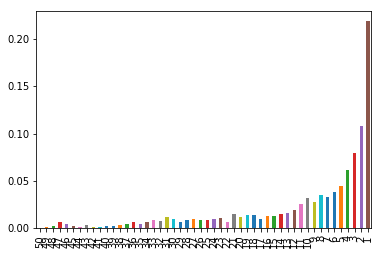

In [22]:
(bus['ride_id'].value_counts().value_counts().sort_index(ascending=False)/bus['ride_id'].value_counts().value_counts().sort_index(ascending=False).sum()).plot.bar()

Looks like a lot of the buses are leaving with only a few passengers. 

In [23]:
bus.head()

,ride_id,travel_date,travel_time,travel_from,car_type,number_of_tickets,hour_booked,m_y,day
0,1442,2017-10-17,7:15,Migori,Bus,1.0,7,2017-10,2
1,5437,2017-11-19,7:12,Migori,Bus,1.0,7,2017-11,0
2,5710,2017-11-26,7:05,Keroka,Bus,1.0,7,2017-11,0
3,5777,2017-11-27,7:10,Homa Bay,Bus,5.0,7,2017-11,1
4,5778,2017-11-27,7:12,Migori,Bus,31.0,7,2017-11,1


In [24]:
#percentage of vehicle that is full
bus_full = (bus['ride_id'].value_counts()/49)*100
shuttle_full = (shuttle['ride_id'].value_counts()/11)*100


In [25]:
for x in bus_full.index:
    bus.loc[bus['ride_id'].isin([x]), 'p_filled'] = bus_full[x]

/home/gtechzilla/anaconda3/envs/machine_learning/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/gtechzilla/anaconda3/envs/machine_learning/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
data_processed["car_type"] = pd.Categorical(data_processed["car_type"])
car_type_categories = data_processed.car_type.cat.categories
data_processed["car_type"] = data_processed.car_type.cat.codes

In [27]:
bus.head()

,ride_id,travel_date,travel_time,travel_from,car_type,number_of_tickets,hour_booked,m_y,day,p_filled
0,1442,2017-10-17,7:15,Migori,Bus,1.0,7,2017-10,2,2.040816
1,5437,2017-11-19,7:12,Migori,Bus,1.0,7,2017-11,0,2.040816
2,5710,2017-11-26,7:05,Keroka,Bus,1.0,7,2017-11,0,2.040816
3,5777,2017-11-27,7:10,Homa Bay,Bus,5.0,7,2017-11,1,10.204082
4,5778,2017-11-27,7:12,Migori,Bus,31.0,7,2017-11,1,63.265306


In [28]:
for x in shuttle_full.index:
    shuttle.loc[shuttle['ride_id'].isin([x]), 'p_filled'] = shuttle_full[x]

In [29]:
shuttle.head()

,ride_id,travel_date,travel_time,travel_from,car_type,number_of_tickets,hour_booked,m_y,day,p_filled
12,5784,2018-04-20,5:10,Kisii,shuttle,1.0,5,2018-04,5,9.090909
13,5789,2018-04-20,9:50,Kisii,shuttle,1.0,9,2018-04,5,9.090909
16,5791,2018-04-20,6:00,Kisii,shuttle,1.0,6,2018-04,5,9.090909
17,5792,2018-04-20,5:50,Kisii,shuttle,1.0,5,2018-04,5,9.090909
18,5793,2018-04-20,10:58,Kisii,shuttle,1.0,10,2018-04,5,9.090909


Categorical data

In [42]:

data_processed["travel_from"] = pd.Categorical(data_processed["travel_from"])
travel_from_categories = data_processed.travel_from.cat.categories
data_processed["travel_from"] = data_processed.travel_from.cat.codes

'''
data_processed["m_y"] = pd.Categorical(data_processed["m_y"])
m_y_categories = data_processed.travel_from.cat.categories
data_processed["m_y"] = data_processed.travel_from.cat.codes

data_processed["day"] = pd.Categorical(data_processed["day"])
day_categories = data_processed.travel_from.cat.categories
data_processed["day"] = data_processed.travel_from.cat.codes

data_processed["hour_booked"] = pd.Categorical(data_processed["hour_booked"])
hour_booked_categories = data_processed.travel_from.cat.categories
data_processed["hour_booked"] = data_processed.travel_from.cat.codes
'''
#express travel time in minutes
from datetime import datetime
#data_processed['travel_date'] = pd.datetime(data_processed['travel_date'])
#data_processed["travel_time"] = data_processed["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [43]:
y = data_processed['number_of_tickets']
data_processed.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'number_of_tickets', 'hour_booked', 'm_y', 'day'],
      dtype='object')

In [50]:
features=data_processed[['ride_id', 'travel_time', 'travel_from', 'car_type']]
X=features

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lm = LinearRegression()

In [54]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 9 columns):
ride_id              51645 non-null int64
travel_date          51645 non-null datetime64[ns]
travel_time          51645 non-null int64
travel_from          51645 non-null int8
car_type             51645 non-null int8
number_of_tickets    51645 non-null float64
hour_booked          51645 non-null category
m_y                  51645 non-null category
day                  51645 non-null category
dtypes: category(3), datetime64[ns](1), float64(1), int64(2), int8(2)
memory usage: 1.8 MB


In [55]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-8.91805654e-05  1.48205670e-02 -1.11236086e-01 -1.31466843e+01]


In [56]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

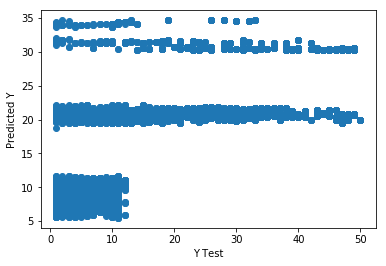

In [57]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [58]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.466192245153922
MSE: 103.0689617291095
RMSE: 10.152288497137455


In [59]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 1500, max_depth = 12,min_samples_split = 2,
                                        learning_rate = 0.01,min_samples_leaf = 8, loss = 'ls')

/home/gtechzilla/anaconda3/envs/machine_learning/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [60]:
clf.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=12,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=8, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [61]:
clf.score(X_test,y_test)

0.9930705991979824

In [62]:
from sklearn.ensemble import RandomForestRegressor
mode = RandomForestRegressor(max_features='auto', n_estimators=1200,min_samples_leaf=4,random_state=7,
                              max_depth=80,min_samples_split=10,bootstrap=True,criterion='mae',n_jobs=-1)

In [63]:
mode.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=80,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=-1,
           oob_score=False, random_state=7, verbose=0, warm_start=False)

In [64]:
mode.score(X_test,y_test)

0.9745817655388768

In [66]:
from sklearn.metrics import mean_absolute_error
preds_train_set = mode.predict(X)
print (mean_absolute_error(preds_train_set,y))

0.7148334946913222


In [68]:
#fetching the data
data_test=pd.read_csv('test_questions.csv')

In [69]:
data_test1=data_test[['ride_id','travel_time','travel_from','car_type']]

In [71]:
data_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 4 columns):
ride_id        1111 non-null int64
travel_time    1111 non-null object
travel_from    1111 non-null object
car_type       1111 non-null object
dtypes: int64(1), object(3)
memory usage: 34.8+ KB


In [72]:
data_test1["car_type"] = pd.Categorical(data_test1["car_type"], categories=car_type_categories)
data_test1["car_type"] = data_test1.car_type.cat.codes

/home/gtechzilla/anaconda3/envs/machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/gtechzilla/anaconda3/envs/machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [73]:
data_test1["travel_from"] = pd.Categorical(data_test1["travel_from"], categories=travel_from_categories)
data_test1["travel_from"] = data_test1.travel_from.cat.codes

/home/gtechzilla/anaconda3/envs/machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/gtechzilla/anaconda3/envs/machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [74]:
data_test1["travel_time"] = data_test1["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

/home/gtechzilla/anaconda3/envs/machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
data_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 4 columns):
ride_id        1111 non-null int64
travel_time    1111 non-null int64
travel_from    1111 non-null int8
car_type       1111 non-null int8
dtypes: int64(2), int8(2)
memory usage: 19.6 KB


In [77]:
X_test = data_test1
test_set_predictions = mode.predict(X_test)

In [78]:
d = {'ride_id': data_test1["ride_id"], 'number_of_ticket': test_set_predictions}
data_predictions = pd.DataFrame(data=d)
data_predictions = data_predictions[['ride_id','number_of_ticket']]

In [79]:
data_predictions['number_of_ticket'] = data_predictions['number_of_ticket'].astype('int64', copy=False)
data_predictions.to_csv('preds_test14.csv', index=False) #save to csv file